In [5]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add src to import custom loader
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from data_loader import load_credit_card_data

# Load credit card data
credit_df = load_credit_card_data("../data/creditcard.csv")
print("✅ Credit card data loaded.")


✅ Credit card data loaded.


Handle Missing Values

In [6]:
# Check for missing values
print("🔍 Missing values in credit_df:")
total_missing = credit_df.isnull().sum()
display(total_missing[total_missing > 0])

# Summary
if total_missing.sum() == 0:
    print("✅ No missing values found.")
else:
    print("⚠️ Missing values found.")


🔍 Missing values in credit_df:


Series([], dtype: int64)

✅ No missing values found.


Data Cleaning (Duplicates)

In [7]:
# Check and drop duplicates
dup_count = credit_df.duplicated().sum()
print(f"🧹 Found {dup_count} duplicate rows.")

credit_df = credit_df.drop_duplicates()
print(f"✅ Removed duplicates. New shape: {credit_df.shape}")


🧹 Found 1081 duplicate rows.
✅ Removed duplicates. New shape: (283726, 31)


Univariate EDA

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


⚖️ Class Distribution (Raw):
 Class
0    283253
1       473
Name: count, dtype: int64
📊 Class Distribution (%):
 Class
0    0.998333
1    0.001667
Name: count, dtype: float64


C:\Users\filimon.hailemariam\AppData\Local\Temp\ipykernel_11412\534959266.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit_df, x='Class', palette='Set2')


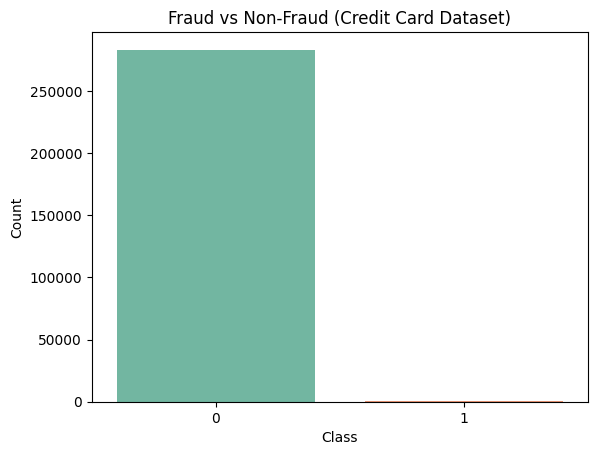

In [8]:
# Summary statistics
display(credit_df.describe())

# Class distribution
class_counts = credit_df['Class'].value_counts()
class_ratio = class_counts / class_counts.sum()
print("⚖️ Class Distribution (Raw):\n", class_counts)
print("📊 Class Distribution (%):\n", class_ratio)

sns.countplot(data=credit_df, x='Class', palette='Set2')
plt.title("Fraud vs Non-Fraud (Credit Card Dataset)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Visualize Amount & Time

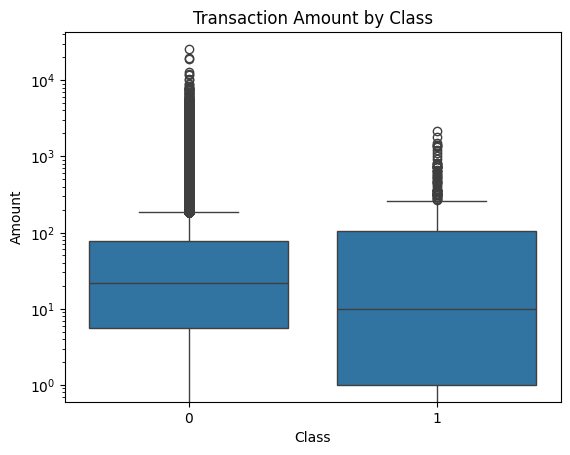

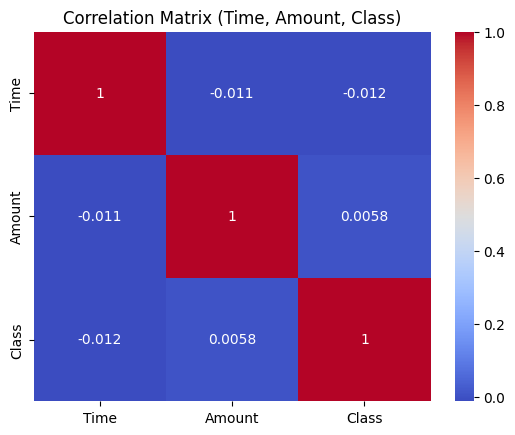

In [9]:
# Histogram of transaction amount by class
sns.boxplot(data=credit_df, x='Class', y='Amount')
plt.yscale('log')
plt.title("Transaction Amount by Class")
plt.show()

# Correlation of amount and time with class
corr_matrix = credit_df[['Time', 'Amount', 'Class']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Time, Amount, Class)")
plt.show()


Interpretation: Transaction Amount by Class
This boxplot compares the distribution of transaction amounts between non-fraudulent (class 0) and fraudulent (class 1) transactions:

Both classes exhibit right-skewed distributions with many outliers.

Fraudulent transactions (class 1) tend to have slightly lower median values but a wider interquartile range, suggesting more variability in fraudulent behavior.

High-value outliers are present in both classes, but more extreme values appear in the non-fraudulent group.

🔎 Insight:
Transaction amount alone does not strongly separate fraud vs. non-fraud, but its variance and distribution shape may still provide useful signal when combined with other features.

Interpretation: Correlation Matrix (Time, Amount, Class)
This heatmap shows the pairwise correlation between Time, Amount, and Class (fraud label):

All correlation values are very close to 0, indicating no strong linear relationship between these variables.

Amount and Class have a slightly positive but negligible correlation (≈ 0.0058).

Time and Class have a tiny negative correlation (≈ -0.012), suggesting transaction time doesn't linearly influence fraud likelihood.

🔎 Insight:
Neither transaction time nor amount alone provides strong linear predictive power for fraud. These features might still be useful when combined non-linearly with other variables in a machine learning model.

Scale Amount and optionally Time

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
credit_df[['Amount', 'Time']] = scaler.fit_transform(credit_df[['Amount', 'Time']])

print("✅ Scaled 'Amount' and 'Time' using MinMaxScaler.")


✅ Scaled 'Amount' and 'Time' using MinMaxScaler.


Save Processed Data to csv file

In [11]:
# Save processed dataset
credit_df.to_csv("../data/creditcard_ready.csv", index=False)
print("💾 Saved cleaned and scaled credit card data to 'creditcard_ready.csv'")


💾 Saved cleaned and scaled credit card data to 'creditcard_ready.csv'
